## Resnet 50 - pretrain 되어있는 것 사용해서 train 시켜보기 
참고 사이트 - transform, resnet가져오기 : https://dacon.io/en/codeshare/4750  
참고 사이트 - k-fold validaion : https://velog.io/@pppanghyun/6.-%EA%B5%90%EC%B0%A8-%EA%B2%80%EC%A6%9DCross-Validation 

In [5]:
!python --version
# 위에 써져있는 3.11.3은 전에 그래서 그런듯 -이제 conda list에도 3.11 없음

Python 3.8.8


In [22]:
!pip install torchsummary
from torchsummary import summary

In [6]:
from torchvision import models
import torchvision
import torch

In [35]:
resnet = models.resnet101(pretrained = True)


AttributeError: module 'torchvision.models' has no attribute 'efficientnet_v2_m'

In [38]:
models.efficientnet_v2_m

AttributeError: module 'torchvision.models' has no attribute 'efficientnet_v2_m'

In [44]:
import torch
torch.__version__

'1.8.1+cu102'

In [34]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [25]:
vgg = models.vgg13_bn(pretrained = True)


In [37]:
effi = torchvision.models.efficientnet_b5(pretrained = True)

AttributeError: module 'torchvision.models' has no attribute 'efficientnet_b5'

In [31]:
def get_n_parameter(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp+=nn
    return pp

In [33]:
get_n_parameter(resnet)

44549160

In [32]:
# fc layer확인
print(resnet.fc)
infeature = resnet.fc.in_features
print(infeature)

Linear(in_features=2048, out_features=1000, bias=True)
2048


In [21]:
# fc layer바꾸기
resnet.fc = torch.nn.Linear(infeature, 2)
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

data 만들기 & 확인

In [31]:
import torchvision.transforms as transforms
pretransform = transforms.Compose([transforms.Resize((512,512)), transforms.ToTensor()])

In [33]:
data = torchvision.datasets.ImageFolder("/root/jieunoh/cervical_deformity/data", pretransform)

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from torchvision.transforms import ToTensor,ToPILImage

Dataset ImageFolder
    Number of datapoints: 748
    Root location: /root/jieunoh/cervical_deformity/data
    StandardTransform
Transform: Compose(
               Resize(size=(512, 512), interpolation=bilinear)
               ToTensor()
           )
torch.Size([3, 512, 512]) 0


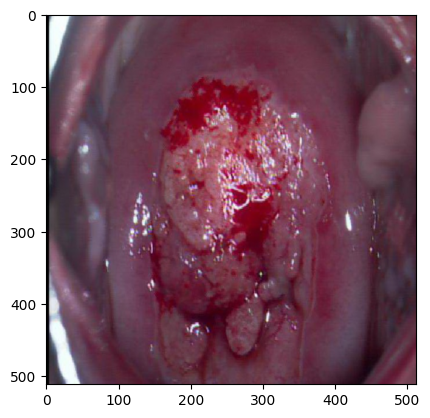

torch.Size([3, 512, 512]) 0


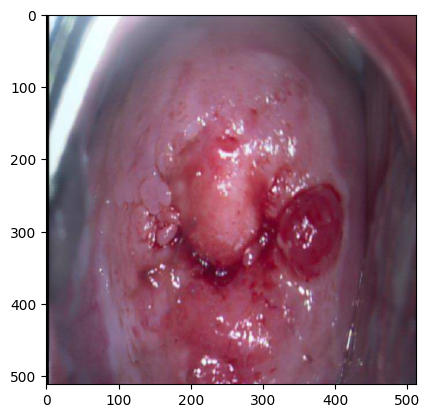

torch.Size([3, 512, 512]) 0


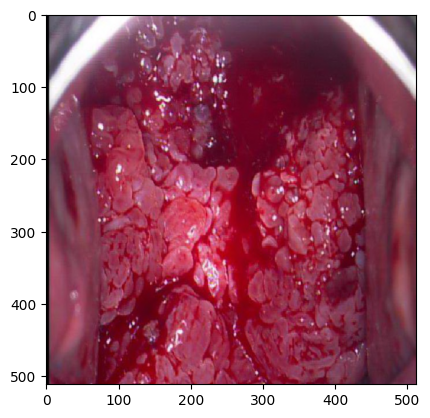

torch.Size([3, 512, 512]) 0


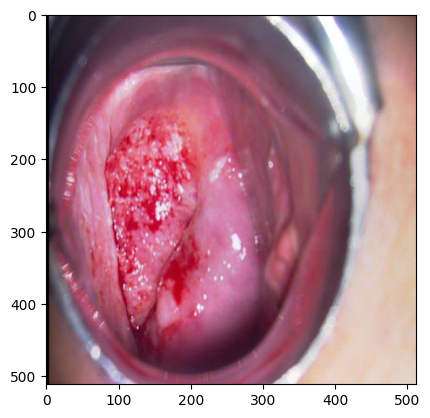

torch.Size([3, 512, 512]) 0


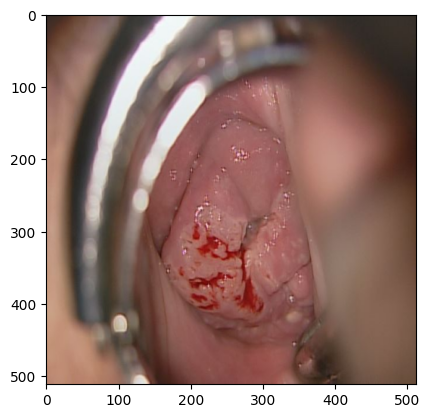

torch.Size([3, 512, 512]) 0


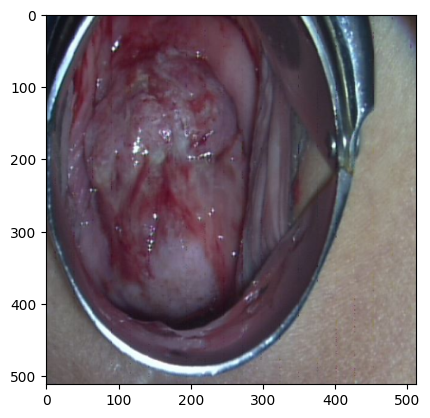

torch.Size([3, 512, 512]) 0


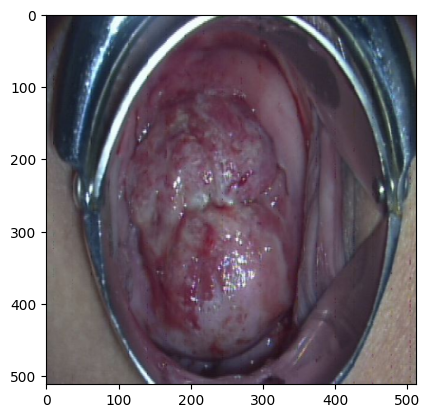

torch.Size([3, 512, 512]) 0


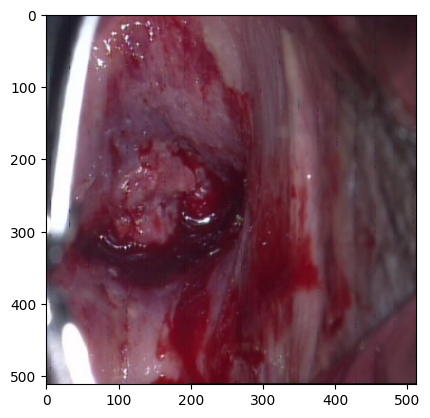

torch.Size([3, 512, 512]) 0


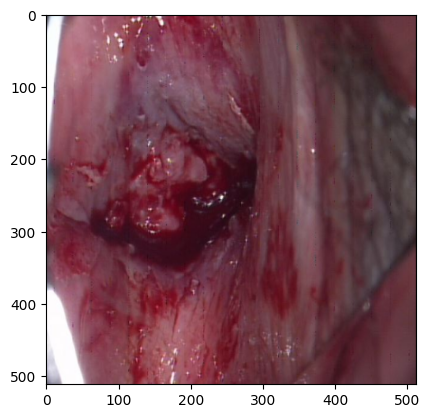

torch.Size([3, 512, 512]) 0


KeyboardInterrupt: 

In [45]:
print(data)
for i in range(len(data)):
    print(data[i][0].shape, data[i][1])
    plt.imshow(ToPILImage()(data[i][0]))
    plt.show()
    plt.close()
    if i ==10: 
        break
    

Train 해보기 with k-fold cross validation  
참고 사이트 - k-fold : https://velog.io/@pppanghyun/6.-%EA%B5%90%EC%B0%A8-%EA%B2%80%EC%A6%9DCross-Validation  
참고 사이트 - 전체적으로 모델 돌리기: https://2021-01-06getstarted.tistory.com/m/49 

In [48]:
# k-fold validaion
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3, shuffle = True)

In [54]:
for fold, (train_idx, val_idx) in enumerate(kfold.split(data)):
    print(fold, len(train_idx), len(val_idx))
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_idx) # index 생성
    val_subsampler = torch.utils.data.SubsetRandomSampler(val_idx) # index 생성
    
    # sampler를 이용한 DataLoader 정의
    trainloader = torch.utils.data.DataLoader(data, batch_size=32, sampler=train_subsampler) # 해당하는 index 추출
    valloader = torch.utils.data.DataLoader(data, batch_size=32, sampler=val_subsampler)

    optimizer = torch.optim.Adam(resnet.parameters(), lr = 0.01, weight_decay=1e-7)

    for epoch in 



    print(trainloader)

0 498 250
1 499 249
2 499 249


In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from sklearn.model_selection import StratifiedKFold

# GPU 사용 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 데이터 폴더 경로
data_dir = "/root/jieunoh/cervical_deformity/data"

# # 데이터 전처리
# transform = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])
pretransform = transforms.Compose([transforms.Resize((512,512)), transforms.ToTensor()])
# 데이터셋 불러오기
dataset = datasets.ImageFolder(root=data_dir, transform=pretransform)

# 3-fold cross validation을 위한 인덱스 생성
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
train_indices, val_indices = next(iter(skf.split(dataset.imgs, dataset.targets)))

# 모델 정의 및 pretrained 가중치 로드
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
model = resnet
num_classes = len(dataset.classes)
model.fc = nn.Linear(2048, num_classes)  # 마지막 레이어를 num_classes에 맞게 수정
model = model.to(device)

# 하이퍼파라미터 설정
batch_size = 32
lr = 0.001
num_epochs = 10

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

train_indices = torch.from_numpy(train_indices)  # Numpy 배열을 Tensor로 변환
val_indices = torch.from_numpy(val_indices)  # Numpy 배열을 Tensor로 변환  

# 3-fold cross validation 반복
for fold, (train_index, val_index) in enumerate(zip(train_indices, val_indices), 1):
    print(f"Fold: {fold}") 
    
    # 데이터로더 생성
    # train_sampler = torch.utils.data.SubsetRandomSampler(train_index)
    # val_sampler = torch.utils.data.SubsetRandomSampler(val_index)
    train_sampler = torch.utils.data.SubsetRandomSampler([train_index])
    val_sampler = torch.utils.data.SubsetRandomSampler([val_index])
    print(train_index)

    train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
    val_loader = DataLoader(dataset, batch_size=batch_size, sampler=val_sampler)

    # 훈련 및 검증 반복
    for epoch in range(1, num_epochs + 1):
        # 훈련
        model.train()
        train_loss = 0.0
        train_correct = 0
        for images, labels in train_loader:
            print(images,labels)
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            print(images,labels)

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(outputs.data, 1)
            train_loss += loss.item() * images.size(0)
            train_correct += (predicted == labels).sum().item()
        train_loss = train_loss / len(train_index)
        train_accuracy = train_correct / len(train_index)

        print(train_loss,train_accuracy )

        # 검증
        model.eval()
        val_loss = 0.0
        val_correct = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                _, predicted = torch.max(outputs.data, 1)
                val_loss += loss.item() * images.size(0)
                val_correct += (predicted == labels).sum().item()
            val_loss = val_loss / len(val_index)
            val_accuracy = val_correct / len(val_index)

            # 결과 출력
            print(f"Epoch [{epoch}/{num_epochs}]")
            print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.4f}")
            print(f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_accuracy:.4f}")



Fold: 1
tensor(0)
tensor([[[[0.0196, 0.0118, 0.0157,  ..., 0.4078, 0.4078, 0.4078],
          [0.0196, 0.0118, 0.0157,  ..., 0.4157, 0.4118, 0.4078],
          [0.0275, 0.0078, 0.0118,  ..., 0.4196, 0.4157, 0.4118],
          ...,
          [0.0078, 0.0118, 0.0118,  ..., 0.4235, 0.4196, 0.4118],
          [0.0078, 0.0118, 0.0118,  ..., 0.4235, 0.4157, 0.4118],
          [0.0039, 0.0118, 0.0118,  ..., 0.4235, 0.4157, 0.4078]],

         [[0.0000, 0.0039, 0.0118,  ..., 0.1961, 0.1961, 0.1961],
          [0.0000, 0.0000, 0.0118,  ..., 0.2039, 0.2000, 0.1961],
          [0.0078, 0.0000, 0.0078,  ..., 0.2078, 0.2039, 0.2000],
          ...,
          [0.0235, 0.0196, 0.0157,  ..., 0.2588, 0.2588, 0.2510],
          [0.0235, 0.0196, 0.0157,  ..., 0.2627, 0.2549, 0.2510],
          [0.0196, 0.0196, 0.0157,  ..., 0.2627, 0.2549, 0.2471]],

         [[0.0235, 0.0235, 0.0353,  ..., 0.2510, 0.2510, 0.2510],
          [0.0235, 0.0196, 0.0353,  ..., 0.2549, 0.2549, 0.2510],
          [0.0235, 0.015

RuntimeError: CUDA error: no kernel image is available for execution on the device

In [62]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [63]:
device

device(type='cuda')

In [64]:
torch.cuda.is_available()

True